In [64]:
import numpy as np
import sunpy
import sunpy.map
from iris_spec_recon import iris_spec_map_interp_from_header
from scipy.io import readsav
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from matplotlib.collections import LineCollection

In [2]:
iris2model = readsav('../../src/IRIS/20221024/2322/iris2model_20221024_232249_3600609177_raster_t000_r00000.sav',verbose=True)['iris2model'][0]

--------------------------------------------------
Date: Wed Apr 17 18:38:31 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 4 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - iris2model [<class 'numpy.recarray'>]
--------------------------------------------------


In [3]:
iris2model.dtype

dtype((numpy.record, [(('input_filename', 'INPUT_FILENAME'), 'O'), (('output_filename', 'OUTPUT_FILENAME'), 'O'), (('inv_db_fits', 'INV_DB_FITS'), 'O'), (('model_db_fits', 'MODEL_DB_FITS'), 'O'), (('rf_db_fits', 'RF_DB_FITS'), 'O'), (('nodes_db_fits', 'NODES_DB_FITS'), 'O'), (('nodes_positions', 'NODES_POSITIONS'), 'O'), (('nodes_values_in_ltau', 'NODES_VALUES_IN_LTAU'), 'O'), (('wl', 'WL'), 'O'), (('flag_mask', 'FLAG_MASK'), 'O'), (('mask_ondata', 'MASK_ONDATA'), 'O'), (('mask_extra', 'MASK_EXTRA'), 'O'), (('mask_extra_data', 'MASK_EXTRA_DATA'), 'O'), (('ima_ref', 'IMA_REF'), 'O'), (('ima_ref_mask', 'IMA_REF_MASK'), 'O'), (('n_w_mask', 'N_W_MASK'), '>i4'), (('n_rp_db_used', 'N_RP_DB_USED'), '>i4'), (('ltau', 'LTAU'), 'O'), (('model', 'MODEL'), 'O'), (('model_dimension_info', 'MODEL_DIMENSION_INFO'), 'O'), (('physical_variable', 'PHYSICAL_VARIABLE'), 'O'), (('uncertainty', 'UNCERTAINTY'), 'O'), (('uncertainty_dimension_info', 'UNCERTAINTY_DIMENSION_INFO'), 'O'), (('uncertainty_variable

In [4]:
ltau = iris2model["ltau"]
atmos = iris2model["model"]
Te, vlos, vturb, Ne = atmos

In [5]:
ltau

array([-7.6       , -7.4       , -7.2       , -7.        , -6.7999997 ,
       -6.6       , -6.3999996 , -6.2       , -6.        , -5.7999997 ,
       -5.6       , -5.3999996 , -5.2       , -5.        , -4.8       ,
       -4.6       , -4.3999996 , -4.2       , -3.9999998 , -3.8       ,
       -3.6       , -3.3999996 , -3.1999998 , -3.        , -2.7999997 ,
       -2.6       , -2.3999996 , -2.1999998 , -2.        , -1.7999997 ,
       -1.5999999 , -1.3999996 , -1.1999998 , -1.        , -0.7999997 ,
       -0.5999999 , -0.39999962, -0.19999981,  0.        ], dtype='>f4')

In [6]:
np.where(ltau == -4.2)

(array([17]),)

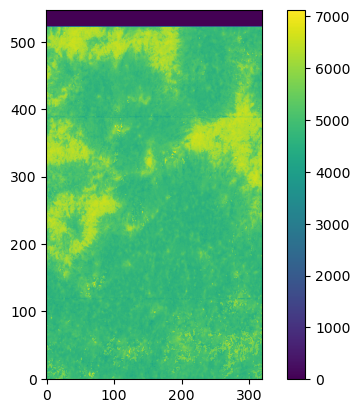

In [7]:
plt.imshow(Te[17,:,:],origin="lower")
plt.colorbar()

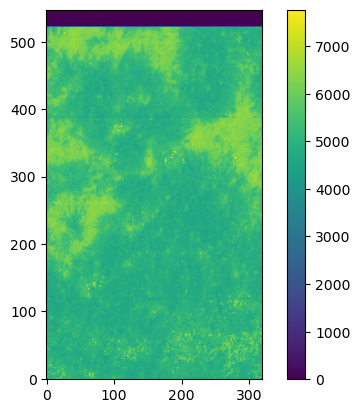

In [8]:
plt.imshow(Te[16,:,:],origin="lower")
plt.colorbar()

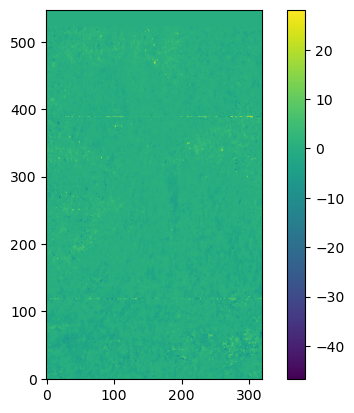

In [57]:
plt.imshow(vlos[15,:,:]/1e5,origin="lower")
plt.colorbar()

In [18]:
Te_interp, irisspec_wcs = iris_spec_map_interp_from_header("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",
                                                          data=Te.transpose(1,2,0),win_ext=6)
Ne_interp, irisspec_wcs = iris_spec_map_interp_from_header("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",
                                                          data=Ne.transpose(1,2,0),win_ext=6)
vlos_interp, irisspec_wcs = iris_spec_map_interp_from_header("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",
                                                          data=vlos.transpose(1,2,0),win_ext=6)
vturb_interp, irisspec_wcs = iris_spec_map_interp_from_header("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",
                                                          data=vturb.transpose(1,2,0),win_ext=6)

In [26]:
irisspec_wcs = WCS(irisspec_wcs)

In [19]:
region_pix_index = np.load('../../src/IRIS/20221024/2322/upflow_region_pix_ind/iris_statistics_1024.npz')

In [44]:
iris_mask_center_1 = (region_pix_index["iris_mask_center_1_y"], region_pix_index["iris_mask_center_1_x"])
iris_mask_center_2 = (region_pix_index["iris_mask_center_2_y"], region_pix_index["iris_mask_center_2_x"])
iris_mask_moss = (region_pix_index["iris_mask_moss_y"], region_pix_index["iris_mask_moss_x"])

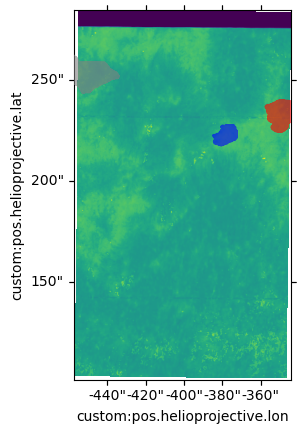

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection=irisspec_wcs)
ax.imshow(Te_interp[:,:,15])
ax.plot_coord(irisspec_wcs.pixel_to_world(iris_mask_center_1[1],iris_mask_center_1[0]),color="red",alpha=0.6)
ax.plot_coord(irisspec_wcs.pixel_to_world(iris_mask_center_2[1],iris_mask_center_2[0]),color="blue",alpha=0.6)
ax.plot_coord(irisspec_wcs.pixel_to_world(iris_mask_moss[1],iris_mask_moss[0]),color="grey",alpha=0.6)

Text(0.5, 0, '$v_{\\rm turb}$ [$\\rm km\\,s^{-1}$]')

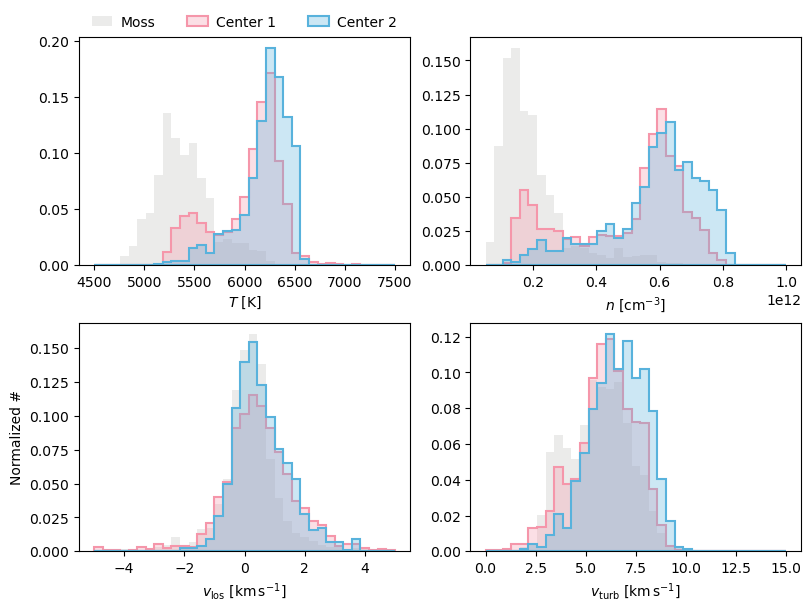

In [163]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6),layout="constrained")

index_ltau = 15
Te_range = (4.5e3,7.5e3)
Ne_range = (5e10,1e12)
vlos_range = (-5,5)
vturb_range = (0,15)
ax1.hist(Te_interp[*iris_mask_moss,index_ltau],bins=35,range=Te_range,facecolor=(189./255,192./255,186./255,0.3),label="Moss",lw=1.5,
        ls="-",histtype="stepfilled",weights=np.ones_like(Te_interp[*iris_mask_moss,index_ltau])/len(Te_interp[*iris_mask_moss,index_ltau]))

ax1.hist(Te_interp[*iris_mask_center_1,index_ltau],bins=35,range=Te_range,facecolor=(245./255,150./255,170./255,0.3),label="Center 1",lw=1.5,
        ls="-",edgecolor=(245./255,150./255,170./255,1),histtype="stepfilled",
         weights=np.ones_like(Te_interp[*iris_mask_center_1,index_ltau])/len(Te_interp[*iris_mask_center_1,index_ltau]))

ax1.hist(Te_interp[*iris_mask_center_2,index_ltau],bins=35,range=Te_range,facecolor=(88./255,178./255,220./255,0.3),label="Center 2",lw=1.5,
        ls="-",edgecolor=(88./255,178./255,220./255,1),histtype="stepfilled",
         weights=np.ones_like(Te_interp[*iris_mask_center_2,index_ltau])/len(Te_interp[*iris_mask_center_2,index_ltau]))

ax2.hist(Ne_interp[*iris_mask_moss,index_ltau],bins=35,range=Ne_range,facecolor=(189./255,192./255,186./255,0.3),label="Moss",lw=1.5,
        ls="-",histtype="stepfilled",weights=np.ones_like(Ne_interp[*iris_mask_moss,index_ltau])/len(Ne_interp[*iris_mask_moss,index_ltau]))

ax2.hist(Ne_interp[*iris_mask_center_1,index_ltau],bins=35,range=Ne_range,facecolor=(245./255,150./255,170./255,0.3),label="Center 1",lw=1.5,
        ls="-",edgecolor=(245./255,150./255,170./255,1),histtype="stepfilled",
         weights=np.ones_like(Ne_interp[*iris_mask_center_1,index_ltau])/len(Ne_interp[*iris_mask_center_1,index_ltau]))

ax2.hist(Ne_interp[*iris_mask_center_2,index_ltau],bins=35,range=Ne_range,facecolor=(88./255,178./255,220./255,0.3),label="Center 2",lw=1.5,
        ls="-",edgecolor=(88./255,178./255,220./255,1),histtype="stepfilled",
         weights=np.ones_like(Ne_interp[*iris_mask_center_2,index_ltau])/len(Ne_interp[*iris_mask_center_2,index_ltau]))

ax3.hist(vlos_interp[*iris_mask_moss,index_ltau]/1e5,bins=35,range=vlos_range,facecolor=(189./255,192./255,186./255,0.3),label="Moss",lw=1.5,
        ls="-",histtype="stepfilled",weights=np.ones_like(vlos_interp[*iris_mask_moss,index_ltau])/len(vlos_interp[*iris_mask_moss,index_ltau]))

ax3.hist(vlos_interp[*iris_mask_center_1,index_ltau]/1e5,bins=35,range=vlos_range,facecolor=(245./255,150./255,170./255,0.3),label="Center 1",lw=1.5,
        ls="-",edgecolor=(245./255,150./255,170./255,1),histtype="stepfilled",
         weights=np.ones_like(vlos_interp[*iris_mask_center_1,index_ltau])/len(vlos_interp[*iris_mask_center_1,index_ltau]))

ax3.hist(vlos_interp[*iris_mask_center_2,index_ltau]/1e5,bins=35,range=vlos_range,facecolor=(88./255,178./255,220./255,0.3),label="Center 2",lw=1.5,
        ls="-",edgecolor=(88./255,178./255,220./255,1),histtype="stepfilled",
         weights=np.ones_like(vlos_interp[*iris_mask_center_2,index_ltau])/len(vlos_interp[*iris_mask_center_2,index_ltau]))

ax4.hist(vturb_interp[*iris_mask_moss,index_ltau]/1e5,bins=35,range=vturb_range,facecolor=(189./255,192./255,186./255,0.3),label="Moss",lw=1.5,
        ls="-",histtype="stepfilled",weights=np.ones_like(vturb_interp[*iris_mask_moss,index_ltau])/len(vturb_interp[*iris_mask_moss,index_ltau]))

ax4.hist(vturb_interp[*iris_mask_center_1,index_ltau]/1e5,bins=35,range=vturb_range,facecolor=(245./255,150./255,170./255,0.3),label="Center 1",lw=1.5,
        ls="-",edgecolor=(245./255,150./255,170./255,1),histtype="stepfilled",
         weights=np.ones_like(vturb_interp[*iris_mask_center_1,index_ltau])/len(vturb_interp[*iris_mask_center_1,index_ltau]))

ax4.hist(vturb_interp[*iris_mask_center_2,index_ltau]/1e5,bins=35,range=vturb_range,facecolor=(88./255,178./255,220./255,0.3),label="Center 2",lw=1.5,
        ls="-",edgecolor=(88./255,178./255,220./255,1),histtype="stepfilled",
         weights=np.ones_like(vturb_interp[*iris_mask_center_2,index_ltau])/len(vturb_interp[*iris_mask_center_2,index_ltau]))

ax1.legend(bbox_to_anchor=(0.,1.05,1,0.1),ncol=3,mode="expand",handletextpad=0.6,
            handlelength=1.5,frameon=False)
ax3.set_ylabel(r"Normalized #",fontsize=10)
ax1.set_xlabel(r"$T$ [K]")
ax2.set_xlabel(r"$n$ [$\rm cm^{-3}$]")
ax3.set_xlabel(r"$v_{\rm los}$ [$\rm km\,s^{-1}$]")
ax4.set_xlabel(r"$v_{\rm turb}$ [$\rm km\,s^{-1}$]")

In [123]:
def get_line_segs(x, ys, *args, **kwargs):
    ny, nx = ys.shape

    segs = np.zeros((ny, nx, 2))
    segs[:,:,1] = ys
    segs[:,:,0] = x

    return LineCollection(segs, *args, **kwargs)

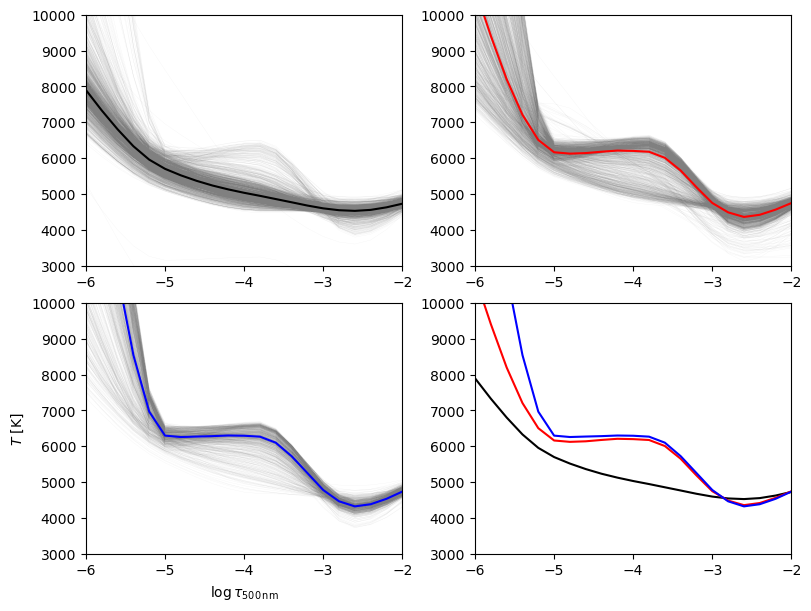

In [165]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6),layout="constrained")

line_Te_moss = get_line_segs(ltau, Te_interp[*iris_mask_moss,:],colors="grey",alpha=0.1,
                                lw=0.2)
line_Te_center_1 = get_line_segs(ltau, Te_interp[*iris_mask_center_1,:],colors="grey",alpha=0.1,
                                lw=0.2)
line_Te_center_2 = get_line_segs(ltau, Te_interp[*iris_mask_center_2,:],colors="grey",alpha=0.1,
                                lw=0.2)

line_Te_moss_aver = np.nanmedian(Te_interp[*iris_mask_moss,:], axis=0)
line_Te_center_1_aver = np.nanmedian(Te_interp[*iris_mask_center_1,:], axis=0)
line_Te_center_2_aver = np.nanmedian(Te_interp[*iris_mask_center_2,:], axis=0)

ax1.add_collection(line_Te_moss)
ax1.plot(ltau, line_Te_moss_aver,color='black')
ax2.add_collection(line_Te_center_1)
ax2.plot(ltau, line_Te_center_1_aver,color='red')
ax3.add_collection(line_Te_center_2)
ax3.plot(ltau, line_Te_center_2_aver,color='blue')

ax4.plot(ltau, line_Te_moss_aver,color='black')
ax4.plot(ltau, line_Te_center_1_aver,color='red')
ax4.plot(ltau, line_Te_center_2_aver,color='blue')

# ax1.add_collection(get_line_segs(ltau, ltau[:, np.newaxis] + ltau[np.newaxis, :],color="grey",alpha=1,
#                                 lw=1))

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.set_xlim(-6,-2)
    ax_.set_ylim(3e3,1e4)

ax3.set_ylabel(r"$T$ [K]")
ax3.set_xlabel(r"$\log\tau_{500\,\rm{nm}}$")
fig.canvas.draw()

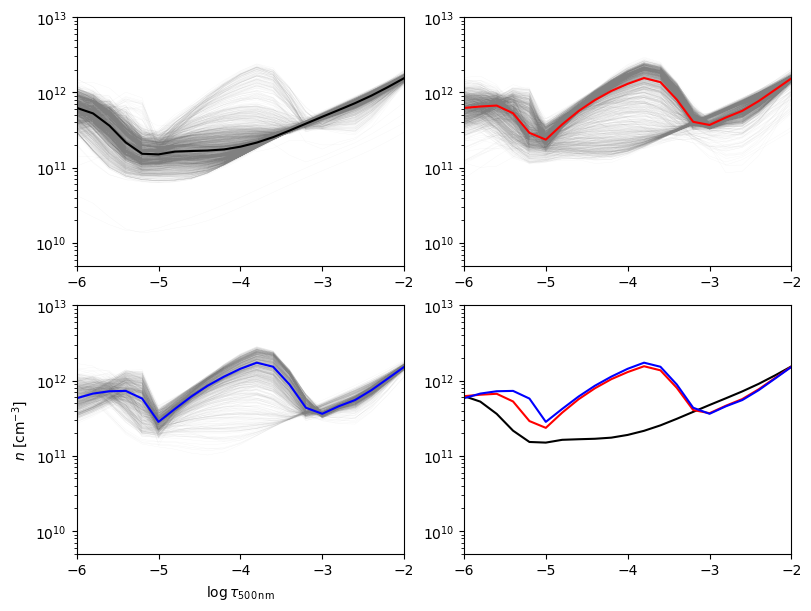

In [166]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6),layout="constrained")

line_Ne_moss = get_line_segs(ltau, Ne_interp[*iris_mask_moss,:],colors="grey",alpha=0.1,
                                lw=0.2)
line_Ne_center_1 = get_line_segs(ltau, Ne_interp[*iris_mask_center_1,:],colors="grey",alpha=0.1,
                                lw=0.2)
line_Ne_center_2 = get_line_segs(ltau, Ne_interp[*iris_mask_center_2,:],colors="grey",alpha=0.1,
                                lw=0.2)

line_Ne_moss_aver = np.nanmedian(Ne_interp[*iris_mask_moss,:], axis=0)
line_Ne_center_1_aver = np.nanmedian(Ne_interp[*iris_mask_center_1,:], axis=0)
line_Ne_center_2_aver = np.nanmedian(Ne_interp[*iris_mask_center_2,:], axis=0)

ax1.add_collection(line_Ne_moss)
ax1.plot(ltau, line_Ne_moss_aver,color='black')
ax2.add_collection(line_Ne_center_1)
ax2.plot(ltau, line_Ne_center_1_aver,color='red')
ax3.add_collection(line_Ne_center_2)
ax3.plot(ltau, line_Ne_center_2_aver,color='blue')

ax4.plot(ltau, line_Ne_moss_aver,color='black')
ax4.plot(ltau, line_Ne_center_1_aver,color='red')
ax4.plot(ltau, line_Ne_center_2_aver,color='blue')

# ax1.add_collection(get_line_segs(ltau, ltau[:, np.newaxis] + ltau[np.newaxis, :],color="grey",alpha=1,
#                                 lw=1))

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.set_xlim(-6,-2)
    ax_.set_ylim(5e9,1e13)
    ax_.set_yscale("log")

ax3.set_ylabel(r"$n$ [$\rm cm^{-3}$]")
ax3.set_xlabel(r"$\log\tau_{500\,\rm{nm}}$")
fig.canvas.draw()

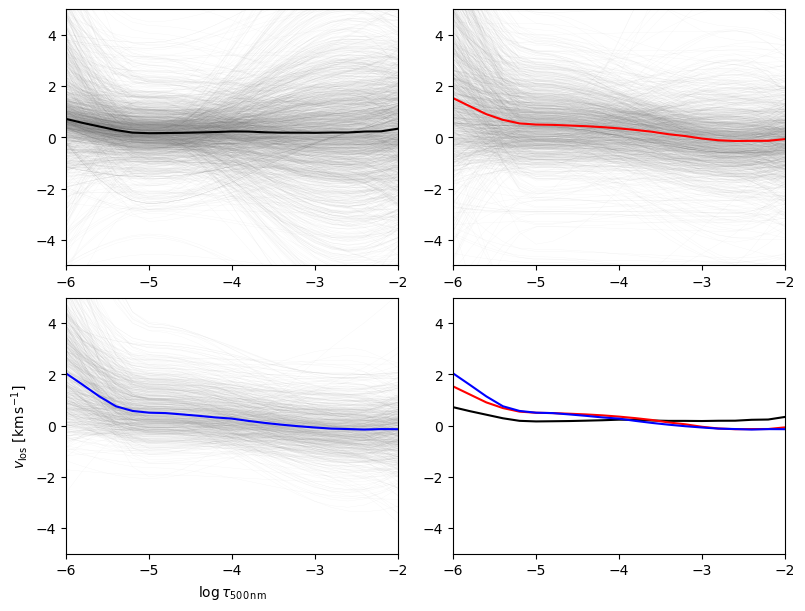

In [167]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6),layout="constrained")

line_vlos_moss = get_line_segs(ltau, vlos_interp[*iris_mask_moss,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)
line_vlos_center_1 = get_line_segs(ltau, vlos_interp[*iris_mask_center_1,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)
line_vlos_center_2 = get_line_segs(ltau, vlos_interp[*iris_mask_center_2,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)

line_vlos_moss_aver = np.nanmedian(vlos_interp[*iris_mask_moss,:]/1e5, axis=0)
line_vlos_center_1_aver = np.nanmedian(vlos_interp[*iris_mask_center_1,:]/1e5, axis=0)
line_vlos_center_2_aver = np.nanmedian(vlos_interp[*iris_mask_center_2,:]/1e5, axis=0)

ax1.add_collection(line_vlos_moss)
ax1.plot(ltau, line_vlos_moss_aver,color='black')
ax2.add_collection(line_vlos_center_1)
ax2.plot(ltau, line_vlos_center_1_aver,color='red')
ax3.add_collection(line_vlos_center_2)
ax3.plot(ltau, line_vlos_center_2_aver,color='blue')

ax4.plot(ltau, line_vlos_moss_aver,color='black')
ax4.plot(ltau, line_vlos_center_1_aver,color='red')
ax4.plot(ltau, line_vlos_center_2_aver,color='blue')

# ax1.add_collection(get_line_segs(ltau, ltau[:, np.newaxis] + ltau[np.newaxis, :],color="grey",alpha=1,
#                                 lw=1))

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.set_xlim(-6,-2)
    ax_.set_ylim(-5,5)

ax3.set_ylabel(r"$v_{\rm los}$ [$\rm km\,s^{-1}$]")
ax3.set_xlabel(r"$\log\tau_{500\,\rm{nm}}$")
fig.canvas.draw()

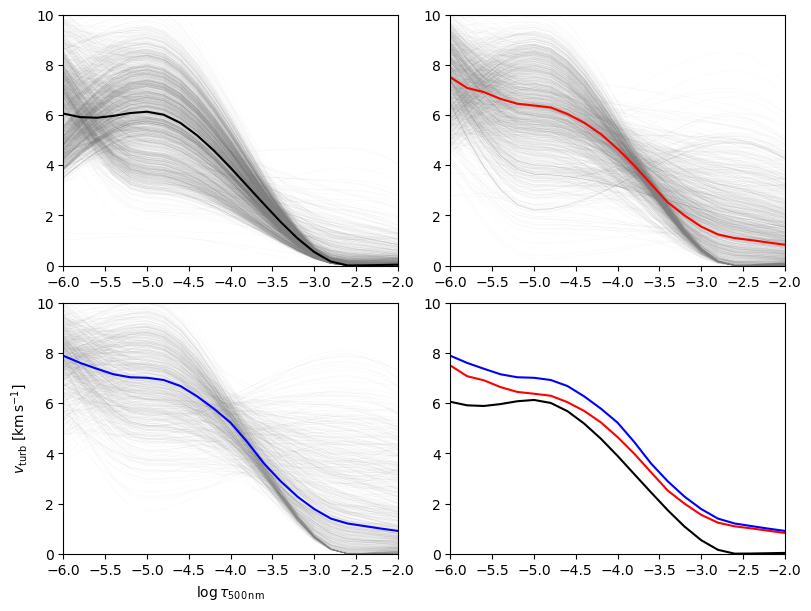

In [168]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6),layout="constrained")

line_vturb_moss = get_line_segs(ltau, vturb_interp[*iris_mask_moss,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)
line_vturb_center_1 = get_line_segs(ltau, vturb_interp[*iris_mask_center_1,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)
line_vturb_center_2 = get_line_segs(ltau, vturb_interp[*iris_mask_center_2,:]/1e5,colors="grey",alpha=0.1,
                                lw=0.2)

line_vturb_moss_aver = np.nanmedian(vturb_interp[*iris_mask_moss,:]/1e5, axis=0)
line_vturb_center_1_aver = np.nanmedian(vturb_interp[*iris_mask_center_1,:]/1e5, axis=0)
line_vturb_center_2_aver = np.nanmedian(vturb_interp[*iris_mask_center_2,:]/1e5, axis=0)

ax1.add_collection(line_vturb_moss)
ax1.plot(ltau, line_vturb_moss_aver,color='black')
ax2.add_collection(line_vturb_center_1)
ax2.plot(ltau, line_vturb_center_1_aver,color='red')
ax3.add_collection(line_vturb_center_2)
ax3.plot(ltau, line_vturb_center_2_aver,color='blue')

ax4.plot(ltau, line_vturb_moss_aver,color='black')
ax4.plot(ltau, line_vturb_center_1_aver,color='red')
ax4.plot(ltau, line_vturb_center_2_aver,color='blue')

# ax1.add_collection(get_line_segs(ltau, ltau[:, np.newaxis] + ltau[np.newaxis, :],color="grey",alpha=1,
#                                 lw=1))

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.set_xlim(-6,-2)
    ax_.set_ylim(0,10)

ax3.set_ylabel(r"$v_{\rm turb}$ [$\rm km\,s^{-1}$]")
ax3.set_xlabel(r"$\log\tau_{500\,\rm{nm}}$")
fig.canvas.draw()